In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
# 2. Đọc file csv
# company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/IMP.csv'
# company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/OPC.csv'
company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/VMD.csv'
data = pd.read_csv(company_csv)
data

,Unnamed: 0,time,open,high,low,close,volume,ticker
0,0,2014-01-02,5980,6240,5980,6240,50,VMD
1,1,2014-01-03,6240,6240,6240,6240,100,VMD
2,2,2014-01-06,6340,6340,6340,6340,860,VMD
3,3,2014-01-07,6340,6340,6340,6340,0,VMD
4,4,2014-01-08,6090,6340,6090,6340,200,VMD
...,...,...,...,...,...,...,...,...
2472,2472,2023-12-04,20300,20300,19700,20300,238300,VMD
2473,2473,2023-12-05,20300,20900,19750,19900,62700,VMD
2474,2474,2023-12-06,20300,20600,20100,20150,51500,VMD
2475,2475,2023-12-07,20150,20300,20000,20150,41100,VMD


In [4]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv(company_csv)
df = df[['close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets 6:3:1
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [5]:
!pip install pmdarima #cai  pmdarima.arima co bao loi mau vang thi can chay dong lenh nay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.0 MB/s eta 0:00:00


In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22603.709, Time=6.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22614.535, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22610.843, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22610.723, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22613.085, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22607.393, Time=3.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22602.960, Time=7.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22605.375, Time=4.85 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22612.759, Time=0.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22602.416, Time=1.97 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=22605.036, Time=0.67 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22603.103, Time=1.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22604.081, Time=3.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=22601.106, Time=1.26 sec
 ARIMA(5,1,0)(0,0,0

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [8]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[20217.41079441 20075.77087498 20052.36487417 20071.88052854
 20083.58221948 20093.39750049 20092.41056937 20090.14126459
 20088.74648135 20088.33710868 20088.63562334 20088.88056217
 20088.98217    20088.97271421 20088.93269544 20088.91159463
 20088.90795447 20088.91243399 20088.91646586 20088.91776656
 20088.91747818 20088.91686041 20088.91654333 20088.91651534
 20088.91659142 20088.9166521  20088.91666927 20088.91666269
 20088.91665303 20088.91664851]


In [9]:
# 7. Đánh giá độ chính xác validate, test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
# test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
# print('Validation RMSE:', valid_rmse)
# print('Testing RMSE:', test_rmse)


# 12. Đánh giá độ chính xác thuật toán bằng RMSE
# def evaluateModel(validate, testt)
#   valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
#   test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
#   print('Validation RMSE:', valid_rmse)
#   print('Testing RMSE:', test_rmse)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE, RMSE, R-square cho testing
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = calculate_mape(y_test, y_pred)
r_squared_test = r2_score(y_test, y_pred)

# Tính MAE, RMSE cho validation
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape_val = calculate_mape(y_val, y_pred_val)
r_squared_val = r2_score(y_val, y_pred_val)

# In kết quả
print('---------VALIDATE----------')
print("MAE:", round(mae_val, 3))
print("RMSE:", round(rmse_val, 3))
print("MAPE:", round(mape_val, 3))
print("R-squared:", round(r_squared_val, 3))
print('--------------------------')
print('---------TEST----------')
print("MAE:", round(mae_val, 3))
print("RMSE:", round(rmse_test, 3))
print("MAPE:", round(mape_test, 3))
print("R-squared:", round(r_squared_test, 3))
print('-------------------')



---------VALIDATE----------
MAE: 2548.507
RMSE: 3119.475
MAPE: 11.441
R-squared: -0.304
--------------------------
---------TEST----------
MAE: 2548.507
RMSE: 9937.794
MAPE: 18.275
R-squared: -0.187
-------------------


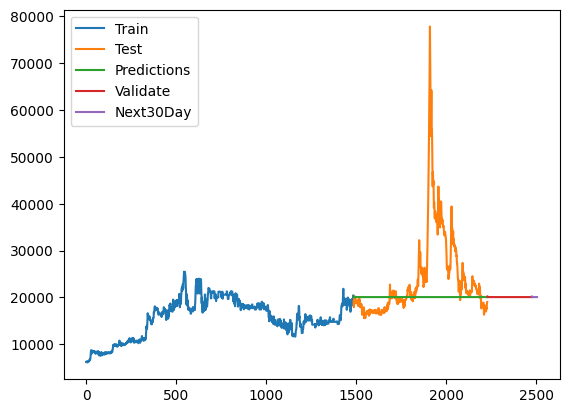

In [10]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [11]:
test_data.index

RangeIndex(start=1486, stop=2229, step=1)